Here - there are many versions of $X$ for trying different things. You can make $X$ whatever YOU want it to be. 

If/when you update $X$, you must also update $Y$ sometimes the $W$'s, etc. 

Always think about what you are doing :)

Compare this to what you do by hand for small examples.

**IMPORTANT**

If you use different $X$ and $y$ values you must also update the following below
```
self.InputNumColumns = ??  ## columns
self.OutputSize = ??
self.HiddenUnits = ??  ## one layer with h units
self.n = ?? ## number of training examples, n
```


In [1]:
import numpy as np
import pandas as pd

# DATAset

Using a dataset with THREE label categories, 1, 2, and 3


In [2]:
filename="HeartRisk_JustNums_3_labels2.csv"
DF = pd.read_csv(filename)
print(DF)

    Label  Cholesterol  Weight  Height
0       0          251     267      70
1       2          105     103      62
2       1          156     193      72
3       2          109     100      63
4       0          198     210      70
5       0          189     189      64
6       2          121     105      65
7       1          134     125      60
8       0          250     156      69
9       2          118     190      71
10      0          290     300      62
11      2          156     119      69
12      2          145     112      68
13      0          178     177      68
14      1          175     145      63
15      0          221     185      70
16      1          200     185      73
17      0          280     279      70
18      1          156     125      70
19      2          123     120      60
20      1          189     154      69
21      0          268     189      68
22      1          178     140      61
23      0          278     300      68
24      1          166   

In [3]:
InputColumns = 3
NumberOfLabels = 3
n = len(DF) ## number of rows of entire X
## Take the label off of X and make it a numpy array
X = np.array(DF.iloc[:, [1, 2, 3]])
## Set y to the label. Check the shape!
y = np.array(DF.iloc[:,0]).T
y = np.array([y]).T
print("y is\n", y)

y is
 [[0]
 [2]
 [1]
 [2]
 [0]
 [0]
 [2]
 [1]
 [0]
 [2]
 [0]
 [2]
 [2]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [2]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [2]
 [1]
 [2]
 [2]
 [2]]


## Creating one hot labels for y 

In [4]:
temp = y
print(temp)

[[0]
 [2]
 [1]
 [2]
 [0]
 [0]
 [2]
 [1]
 [0]
 [2]
 [0]
 [2]
 [2]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [2]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [2]
 [1]
 [2]
 [2]
 [2]]


In [5]:
one_hot_labels = np.zeros((n, NumberOfLabels))
print(one_hot_labels)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [6]:
one_hot_labels[0]

array([0., 0., 0.])

In [7]:
for i in range(n):
    one_hot_labels[i, temp[i]-1] = 1    
print(one_hot_labels)
y = one_hot_labels
print(y)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


# NN class object code

In [8]:
LR=.01
LRB = .01

In [9]:
class NeuralNetwork(object):
    def __init__(self):
        
        self.InputNumColumns = InputColumns  ## columns
        self.OutputSize = 3 ## Categories
        self.HiddenUnits = 2  ## one layer with h units
        self.n = n  ## number of training examples, n
        
        print("Initialize NN\n")
        #Random W1
        self.W1 = np.random.randn(self.InputNumColumns, self.HiddenUnits) # c by h  
       
        print("INIT W1 is\n", self.W1)
        
        ##-----------------------------------------
        ## NOTE ##
        ##
        ## The following are all random. However, you can comment this out
        ## and can set any weights and biases by hand , etc.
        ##
        ##---------------------------------------------
        
        self.W2 = np.random.randn(self.HiddenUnits, self.OutputSize) # h by o 
        print("W2 is:\n", self.W2)
        
        self.b = np.random.randn(1, self.HiddenUnits)
        print("The b's are:\n", self.b)
        ## biases for layer 1
        
        self.c = np.random.randn(1, self.OutputSize)
        print("The c is\n", self.c)
        ## bias for last layer
        
        
    def FeedForward(self, X):
        print("FeedForward\n\n")
        self.z = (np.dot(X, self.W1)) + self.b 
        #X is n by c   W1  is c by h -->  n by h
        print("Z1 is:\n", self.z)
        
        self.h = self.Sigmoid(self.z) #activation function    shape: n by h
        print("H is:\n", self.h)
        
        self.z2 = (np.dot(self.h, self.W2)) + self.c # n by h  @  h by o  -->  n by o  
        print("Z2 is:\n", self.z2)
        
        ## Using Softmax for the output activation
        output = self.Softmax(self.z2)  
        print("output Y^ is:\n", output)
        return output
        
    def Sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s)
        return 1/(1 + np.exp(-s))
    
    def Softmax(self, M):
        #print("M is\n", M)
        expM = np.exp(M)
        #print("expM is\n", expM)
        SM=expM/np.sum(expM, axis=1)[:,None]
        #print("SM is\n",SM )
        return SM 
    
    def BackProp(self, X, y, output):
        print("\n\nBackProp\n")
        self.LR = LR
        self.LRB=LRB  ## LR for biases
        
        # Y^ - Y
        self.output_error = output - y    
        print("Y^ - Y\n", self.output_error)
        
        ## NOTE TO READER........................
        ## Here - we DO NOT multiply by derivative of Sig for y^ b/c we are using 
        ## cross entropy and softmax for the loss and last activation
        # REMOVED # self.output_delta = self.output_error * self.Sigmoid(output, deriv=True) 
        ## So the above line is commented out...............
        
        self.output_delta = self.output_error 
          
        ##(Y^ - Y)(W2)
        self.D_Error_W2 = self.output_delta.dot(self.W2.T) #  D_Error times W2
        #print("W2 is\n", self.W2)
        #print(" D_Error times W2\n", self.D_Error_W2)
        
        ## (H)(1 - H) (Y^ - Y)(Y^)(1-Y^)(W2)
        ## We still use the Sigmoid on H
        
        self.H_D_Error_W2 = self.D_Error_W2 * self.Sigmoid(self.h, deriv=True) 
        
        ## Note that * will multiply respective values together in each matrix
        #print("Derivative sig H is:\n", self.Sigmoid(self.h, deriv=True))
        #print("self.H_D_Error_W2 is\n", self.H_D_Error_W2)
        
        ################------UPDATE weights and biases ------------------
        #print("Old W1: \n", self.W1)
        #print("Old W2 is:\n", self.W2)
        #print("X transpose is\n", X.T)
        
        ##  XT  (H)(1 - H) (Y^ - Y)(Y^)(1-Y^)(W2)
        self.X_H_D_Error_W2 = X.T.dot(self.H_D_Error_W2) ## this is dW1
        
        ## (H)T (Y^ - Y) - 
        self.h_output_delta = self.h.T.dot(self.output_delta) ## this is for dW2
        
        #print("the gradient :\n", self.X_H_D_Error_W2)
        #print("the gradient average:\n", self.X_H_D_Error_W2/self.n)
        
        print("Using sum gradient........\n")
        self.W1 = self.W1 - self.LR*(self.X_H_D_Error_W2) # c by h  adjusting first set (input -> hidden) weights
        self.W2 = self.W2 - self.LR*(self.h_output_delta) 
        
        
        print("The sum of the b update is\n", np.sum(self.H_D_Error_W2, axis=0))
        print("The b biases before the update are:\n", self.b)
        self.b = self.b  - self.LRB*np.sum(self.H_D_Error_W2, axis=0)
        #print("The H_D_Error_W2 is...\n", self.H_D_Error_W2)
        print("Updated bs are:\n", self.b)
        
        self.c = self.c - self.LR*np.sum(self.output_delta, axis=0)
        #print("Updated c's are:\n", self.c)
        
        print("The W1 is: \n", self.W1)
        print("The W1 gradient is: \n", self.X_H_D_Error_W2)
        #print("The W1 gradient average is: \n", self.X_H_D_Error_W2/self.n)
        print("The W2 gradient  is: \n", self.h_output_delta)
        #print("The W2 gradient average is: \n", self.h_output_delta/self.n)
        print("The biases b gradient is:\n",np.sum(self.H_D_Error_W2, axis=0 ))
        print("The bias c gradient is: \n", np.sum(self.output_delta, axis=0))
        ################################################################
        
    def TrainNetwork(self, X, y):
        output = self.FeedForward(X)
        print("Output in TNN\n", output)
        self.BackProp(X, y, output)
        return output

# Train network


In [10]:
MyNN = NeuralNetwork()

TotalLoss=[]
AvgLoss=[]
Epochs= 150  # was originally 1000, but changed to bypass the quarto call stack error

for i in range(Epochs): 
    print("\nRUN:\n ", i)
    output=MyNN.TrainNetwork(X, y)
   
    #print("The y is ...\n", y)
    print("The output is: \n", output)
    MaxValueIndex=np.argmax(output, axis=1)
    print('Prediction y^ is', MaxValueIndex+1)
    ## Using Categorical Cross Entropy...........
    loss = np.mean(-y * np.log(output))  ## We need y to place the "1" in the right place
    print("The current average loss is\n", loss)
    TotalLoss.append(loss)
    AvgLoss.append(loss)
    
    ## OLD---------------------
    # OLD #print("Total Loss:", .5*(np.sum(np.square(output-y))))
    # OLD #TotalLoss.append( .5*(np.sum(np.square(output-y))))
    #print("Average Loss:", .5*(np.mean(np.square((output-y)))))
    #AvgLoss.append(.5*(np.mean(np.square((output-y)))))

Initialize NN

INIT W1 is
 [[ 0.11118863 -1.75296931]
 [ 0.69782595  0.91316995]
 [-0.38831728  0.54102218]]
W2 is:
 [[-0.96423995  0.19736795  0.13542892]
 [ 1.46095569  2.40586702 -0.82720656]]
The b's are:
 [[-0.49909631 -2.27233879]]
The c is
 [[ 0.51044005 -0.93514072 -0.81670016]]

RUN:
  0
FeedForward


Z1 is:
 [[ 186.54656613 -160.57970495]
 [  58.97611012  -58.73423569]
 [ 123.56789224  -60.54015291]
 [  56.93906951  -67.94460057]
 [ 140.87749012 -119.72301894]
 [ 127.55235135 -126.36899724]
 [  60.98582817  -83.33233812]
 [  78.32938561  -90.56265099]
 [ 109.36501487 -260.7296223 ]
 [ 117.63756393    2.79214865]
 [ 217.01771696 -203.13907695]
 [  73.09372414 -129.73779577]
 [  67.37418494 -117.38834525]
 [ 116.402096   -115.88028556]
 [  95.67968629 -142.54792695]
 [ 125.98917987 -182.87056171]
 [ 122.4892669  -144.43513976]
 [ 198.1449476  -200.4577754 ]
 [  76.89236253 -123.71775389]
 [  73.61718101  -75.84583839]
 [ 101.18685685 -155.62483458]
 [ 134.7829836  -262.68948361

# Output and Vis

In [11]:
print("Total Loss List:", TotalLoss) 

Total Loss List: [0.36507733412689153, 0.3613116592525086, 0.3591941375749597, 0.3578983078096701, 0.3570953203285921, 0.3565916104810907, 0.35627158967514255, 0.35606534544490936, 0.35593012328030843, 0.3558395302772503, 0.3557771436678699, 0.35573267560996374, 0.3556996447235578, 0.35567394807716096, 0.35565297780390503, 0.3556350705826729, 0.35561916239397134, 0.35560457084739755, 0.3555908573164917, 0.35557773928303216, 0.3555650344222767, 0.35555262483638267, 0.35554043412196545, 0.3555284126371158, 0.3555165280200905, 0.3555047590788583, 0.3554930918482178, 0.35548151704289843, 0.35547002841091047, 0.3554586216681068, 0.3554472938083466, 0.3554360426565884, 0.35542486657921807, 0.3554137642962047, 0.355402734759241, 0.35539177707265773, 0.3553808904420781, 0.35537007414106875, 0.35535932748946847, 0.3553486498392953, 0.3553380405655762, 0.3553274990603688, 0.35531702472885957, 0.3553066169868074, 0.35529627525886376, 0.35528599897745905, 0.35527578758205863, 0.3552656405186594, 0

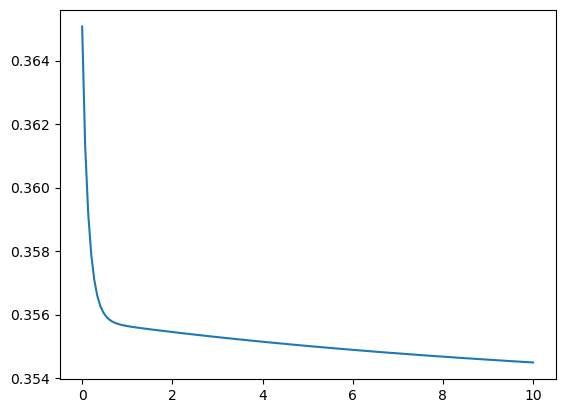

In [12]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, Epochs)
ax.plot(x, TotalLoss)    

(JK Note: The following entire block of code was commented out in the original raw code, and it appears it's because it produces an error.)


In [13]:
# AvgLoss_ = np.mean(AvgLoss)
# print(AvgLoss_)
# fig2 = plt.figure()
# ax = plt.axes()
# x = np.linspace(0, 10, Epochs)
# ax.plot(x, AvgLoss_)  

# print(y)